Librairies imports

In [26]:
#librairy for operations on datasets
import pandas as pd
import numpy as np
from scipy import stats

1. Data Loading And Exploration:

Utilize Pandas to load the dataset and explore its initial structure.
Summarize features, target variable, and their respective data types.
Conduct basic descriptive statistics for an overview of the dataset.

In [31]:
#Utilize Pandas to load the dataset and explore its initial structure.
df = pd.read_csv('train.csv', header= 0)
print(df.head())

#Summarize features, target variable, and their respective data types.
print(df.info())

#Conduct basic descriptive statistics for an overview of the dataset.
df_stats = df.describe().T #Transpose values for better viewing
df_stats['mode'] = df.mode().iloc[0] #Add column for mode
print(df_stats)

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

2. Data Cleaning And Preprocessing:

Address missing or null values.
Transform categorical data into numerical format using suitable methods.

In [32]:
#Address missing or null values.
print(df.isnull().sum()) #There are no missing values within this dataset

#Transform categorical data into numerical format using suitable methods.
print(df.dtypes) #All data was already transformed into numerical format

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


3. Statistical Analysis With NumPy And SciPy:

Execute detailed statistical analysis on each feature, including:
Calculation of central tendency measures (mean, median, mode).
Analysis of variability (range, variance, standard deviation).
Evaluation of distribution shapes through skewness and kurtosis.
Perform hypothesis testing for statistical significance between groups (e.g., different price ranges).
Investigate feature-target correlations using SciPy.
Apply advanced SciPy statistical functions for deeper insights.

In [ ]:
#Calculation of central tendency measures (mean, median, mode).
#Already retrived and stored in df_stats.

#Standard deviation already exists in df_stats
df_stats['variance'] = stats.tvar(df)
df_stats['range'] = df_stats['max'] - df_stats['min']
print(df_stats.head())

#Evaluation of distribution shapes through skewness and kurtosis.
skewness = df.skew(numeric_only=True)
kurtosis = df.kurt(numeric_only=True)  # Excess kurtosis by default

distribution_shapes = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis (Excess)': kurtosis,
    'Kurtosis (True)': kurtosis + 3
})
print(distribution_shapes)

from scipy.stats import f_oneway

# Example for battery_power across all price_range groups
groups = [df[df['price_range'] == pr]['battery_power'] for pr in df['price_range'].unique()]
anova_result = f_oneway(*groups)

print("ANOVA result for battery_power across price_range groups:")
print(f"F-statistic = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")
#Interpretation:
#Null Hypothesis (H₀):The mean of the feature (e.g., battery_power) is the same across all price ranges.
#Alternative Hypothesis (H₁):At least one price range group differs in mean value.
#Since p-value < 0.05, you reject H₀ → the feature's mean varies significantly across price categories.

#Investigate feature-target correlations using SciPy.
from scipy.stats import spearmanr
correlations = []
for col in df.select_dtypes(include='number').columns:
    if col == 'price_range':
        continue
    coef, p = spearmanr(df[col], df['price_range'])
    correlations.append((col, coef, p))
# Convert to DataFrame
corr_df = pd.DataFrame(correlations, columns=['Feature', 'Spearman Coefficient', 'p-value'])
corr_df['Significant'] = corr_df['p-value'] < 0.05
# Sort by strength of correlation
corr_df.sort_values(by='Spearman Coefficient', key=abs, ascending=False, inplace=True)
print(corr_df)
# Price range seems significantly correlated to ram, battery_power, screen size and int_memory
#Normality test
from scipy.stats import shapiro, normaltest
normality_results = []
for col in df.select_dtypes(include='number').columns:
    if col == 'price_range':
        continue
    stat, p = normaltest(df[col])
    normality_results.append((col, stat, p))
normal_df = pd.DataFrame(normality_results, columns=['Feature', 'Stat', 'p-value'])
normal_df['Normally Distributed'] = normal_df['p-value'] > 0.05
print(normal_df)
#None of our features are normally distributed.




                count        mean         std    min     25%     50%      75%  \
battery_power  2000.0  1238.51850  439.418206  501.0  851.75  1226.0  1615.25   
blue           2000.0     0.49500    0.500100    0.0    0.00     0.0     1.00   
clock_speed    2000.0     1.52225    0.816004    0.5    0.70     1.5     2.20   
dual_sim       2000.0     0.50950    0.500035    0.0    0.00     1.0     1.00   
fc             2000.0     4.30950    4.341444    0.0    1.00     3.0     7.00   

                  max   mode       variance   range  
battery_power  1998.0  618.0  193088.359838  1497.0  
blue              1.0    0.0       0.250100     1.0  
clock_speed       3.0    0.5       0.665863     2.5  
dual_sim          1.0    1.0       0.250035     1.0  
fc               19.0    0.0      18.848134    19.0  
               Skewness  Kurtosis (Excess)  Kurtosis (True)
battery_power  0.031898          -1.224144         1.775856
blue           0.020016          -2.001602         0.998398
clock_spe

Data Visualization With Matplotlib:

Produce histograms, scatter plots, and box plots for data distribution and relationship insights.
Employ heatmaps for correlation visualization.
Ensure clarity in plots with appropriate titles, labels, and axis information.

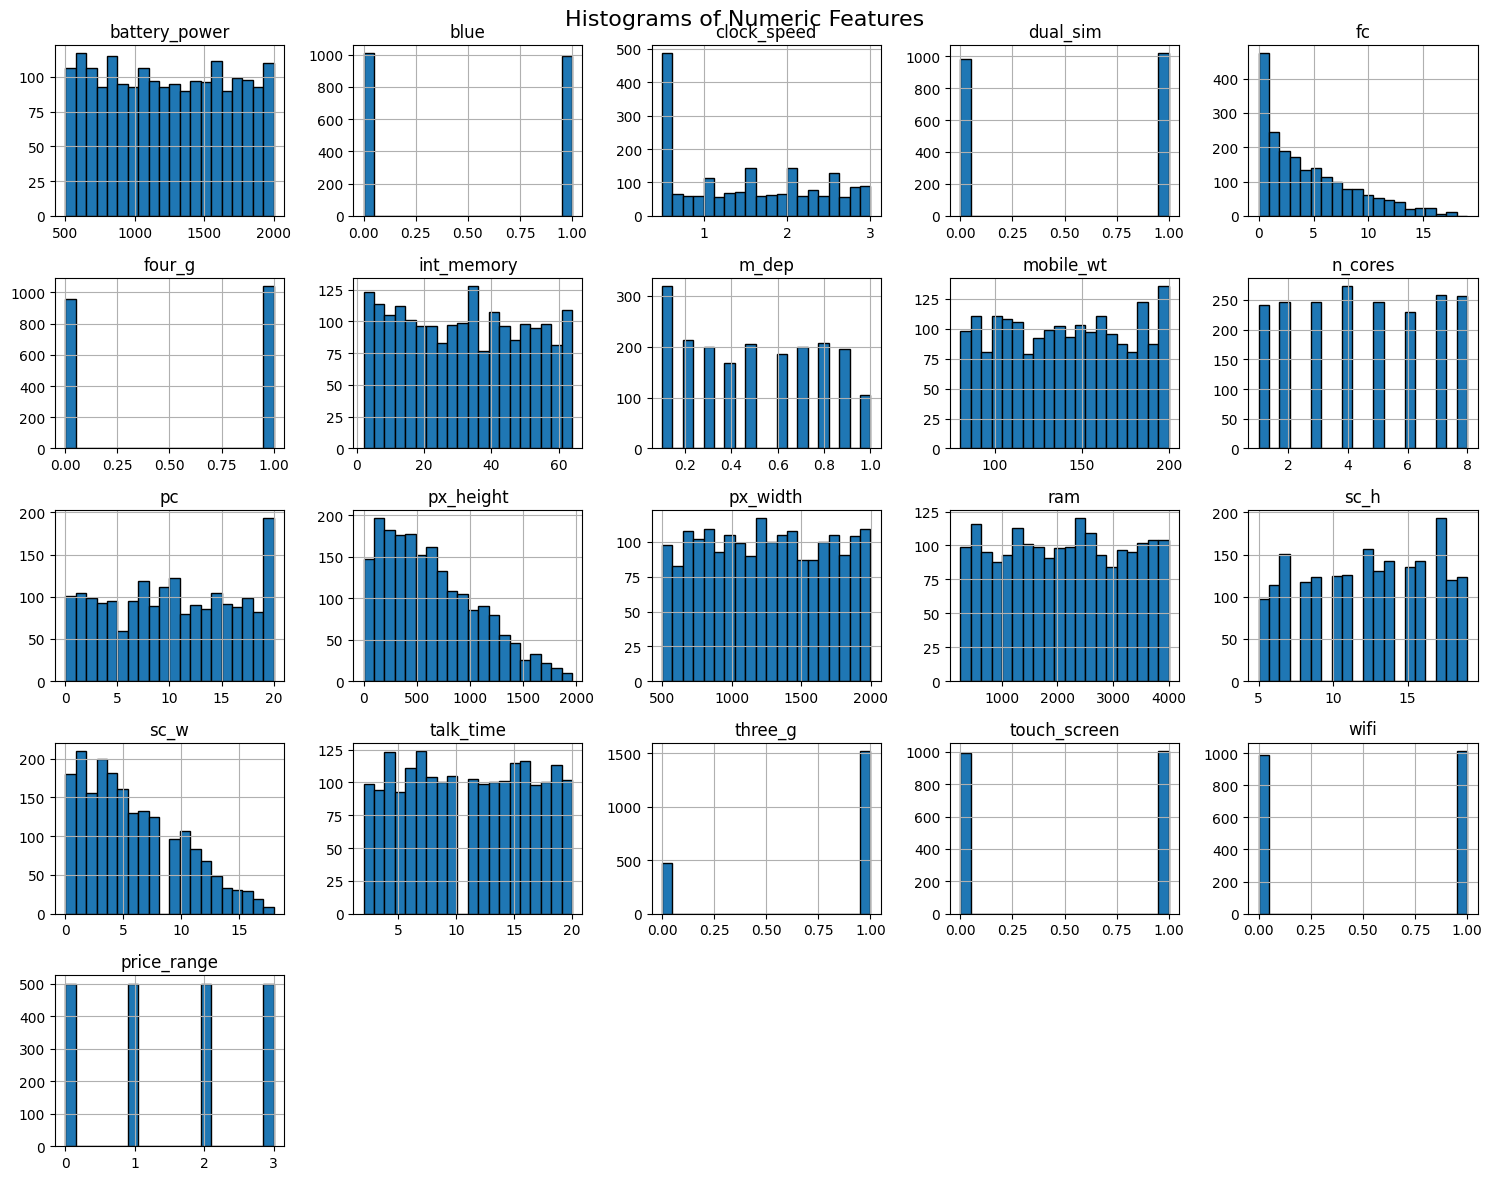

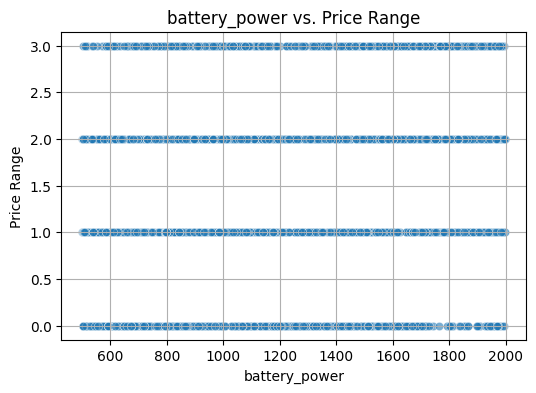

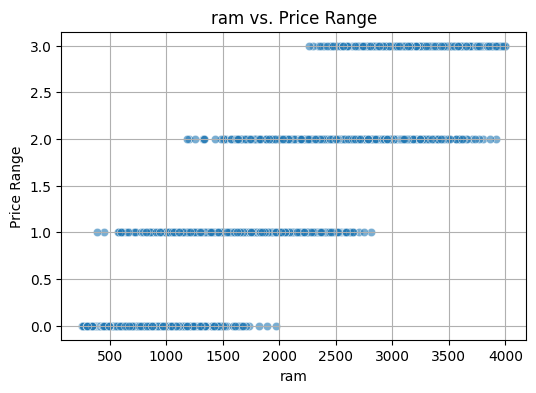

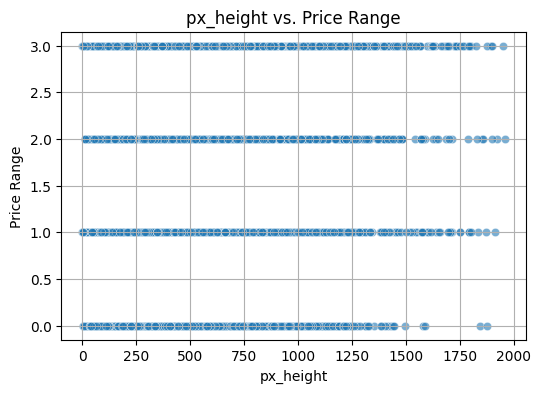

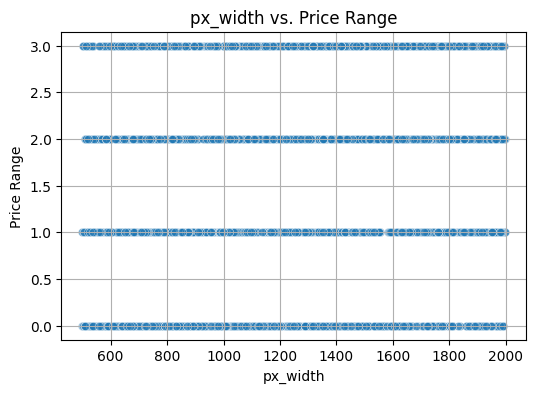

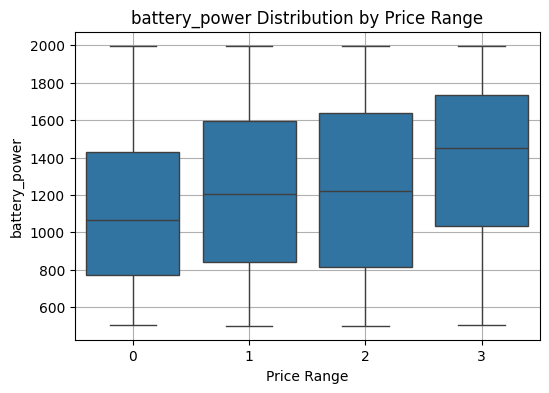

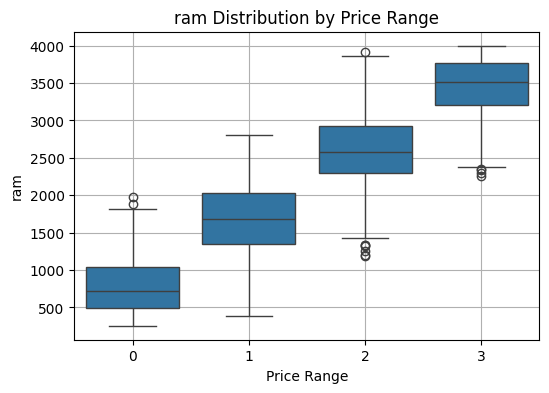

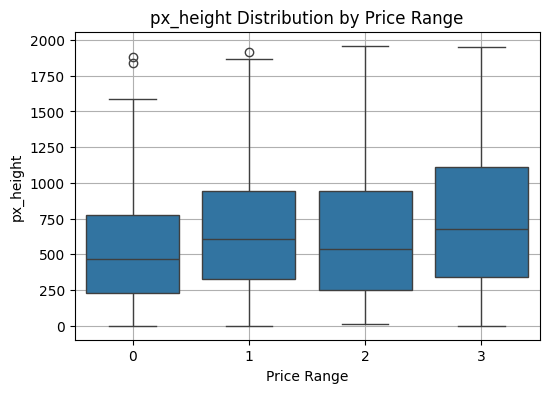

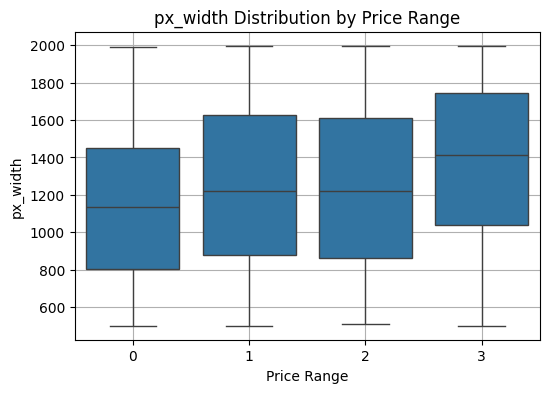

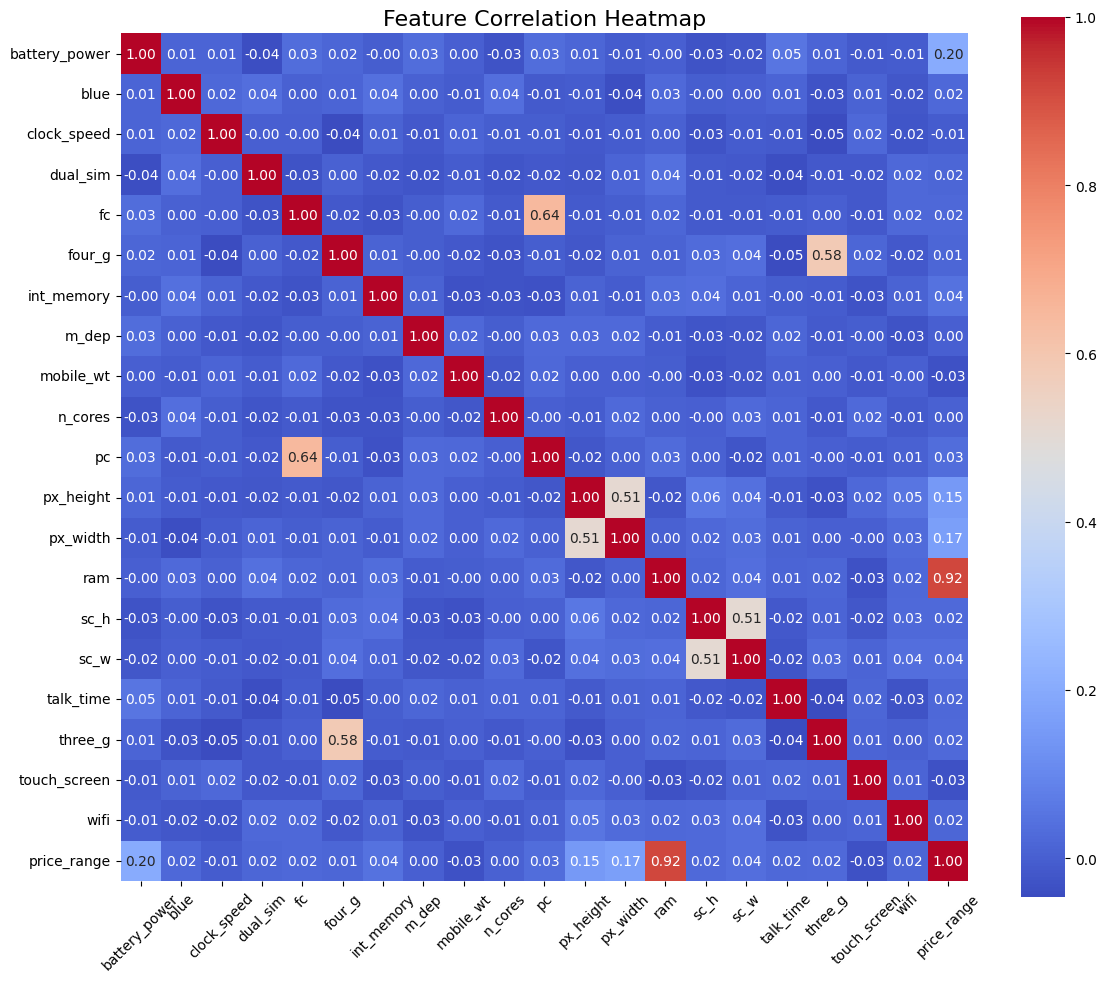

In [48]:
#Produce histograms, scatter plots, and box plots for data distribution and relationship insights.
#1. Histograms for Numerical Features
import matplotlib.pyplot as plt

df.select_dtypes(include='number').hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

#2. Scatter Plots: Feature vs. Target
import seaborn as sns

features_to_plot = ['battery_power', 'ram', 'px_height', 'px_width']
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['price_range'], alpha=0.6)
    plt.title(f'{feature} vs. Price Range')
    plt.xlabel(feature)
    plt.ylabel('Price Range')
    plt.grid(True)
    plt.show()

#3. Box Plots: Group-wise Feature Distribution
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='price_range', y=feature, data=df)
    plt.title(f'{feature} Distribution by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

#4. Heatmap: Correlation Between Numeric Features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

